In [1]:
import pandas as pd
import requests
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import plot_confusion_matrix

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
r = requests.get(url, allow_redirects=True)
open('iris.txt','wb').write(r.content)

4551

In [3]:
header = ['sepal_length','sepal_width','petal_length','petal_width','names']
df = pd.read_csv('iris.txt',names = header,index_col =False)
df.head(10)


,sepal_length,sepal_width,petal_length,petal_width,names
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
### convert string y-value into numerical, wasn't necessary, doing this due to the following function 
###plot_confusion matrix must use float value instead of string
def name_to_numeric(x):
    if x=='Iris-setosa':return 1
    if x =='Iris-versicolor':return 2
    if x =='Iris-virginica':return 3

df['names'] = df['names'].apply(name_to_numeric)

In [5]:
X = df.iloc[:,:-1]
X.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [6]:
y = (df.iloc[:,-1:])
y.head(3)

,names
0,1
1,1
2,1


In [7]:
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size = 0.2, random_state = 0)
clf = KNeighborsClassifier(5)
clf.fit(X_train,np.ravel(y_train))
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9666666666666667

##### Since Knn is probably the simplest within this series, lets also include a confusion matrix for visualization and discussion purposes.
#### Based on the confusion matrix, it can be seen that versicolor and virginica may have a closer appearance, resulting in slight inacuracy

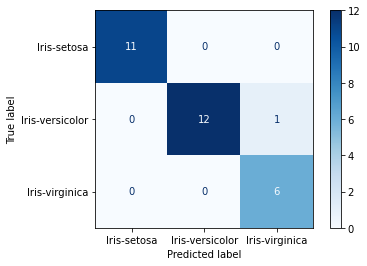

In [19]:
labels = ['Iris-setosa','Iris-versicolor','Iris-virginica']
plot_confusion_matrix(clf,X_test,y_test,cmap=plt.cm.Blues,display_labels=labels)